# 金融时间序列分析

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
# plt.style.use('seaborn') 这一步老师写的，报错
# %matplotlib inline 这一步老师写的，报错
import seaborn as sns  # chatgpt
sns.set()   # chatgpt
%matplotlib inline

### 导入数据
- 1：以时间为索引：index_col=0
- 2：将时间转换成标准格式：parse_dates=True

注意：当你使用 parse_dates=True 时，Pandas 会自动检测并解析可能代表日期的列，并将其转换为 datetime64 格式。这对你在数据分析中的时间序列操作有很大的帮助。如果你不进行日期解析，日期列将被视为普通的字符串（object 类型），这会影响你对日期列的处理能力。
- 3：绘制展示各个指标的走势情况

In [2]:
# 任务1：以时间为索引：index_col=0
# 任务2：将时间转换成标准格式：parse_dates=True
data = pd.read_csv('data.csv',index_col=0, parse_dates=True)

这张表格记录了2010年1月1日至2018年6月29日，多个金融资产在特定日期的价格和指数数据。每一列代表不同的金融资产或指数，以下是每一列的简要说明：

1. **AAPL.O**: 苹果公司（Apple Inc.）的股票价格。
2. **MSFT.O**: 微软公司（Microsoft Corporation）的股票价格。
3. **INTC.O**: 英特尔公司（Intel Corporation）的股票价格。
4. **AMZN.O**: 亚马逊公司（Amazon.com Inc.）的股票价格。
5. **GS.N**: 高盛集团（Goldman Sachs Group Inc.）的股票价格。
6. **SPY**: 标普500指数的交易型开放式指数基金（ETF）的价格。
7. **.SPX**: 标普500指数（S&P 500 Index）的值。
8. **.VIX**: 芝加哥期权交易所波动率指数（CBOE Volatility Index），通常被称为“恐慌指数”，反映市场预期的未来30天的波动性。
9. **EUR=**: 欧元兑美元汇率（EUR/USD）。
10. **XAU=**: 黄金价格（美元/盎司）。
11. **GDX**: 纽约证券交易所Arca金矿ETF（VanEck Vectors Gold Miners ETF）的价格，代表金矿公司股票的表现。
12. **GLD**: SPDR黄金信托（SPDR Gold Trust ETF）的价格，反映黄金现货价格的表现。

这些列的数据可以用来分析不同金融资产在特定时间段内的表现和市场趋势。

In [3]:
data.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


### 数据中各个指标含义:
- AAPL.O   | Apple Stock
- MSFT.O   | Microsoft Stock
- INTC.O   | Intel Stock
- AMZN.O   | Amazon Stock
- GS.N     | Goldman Sachs Stock
- SPY      | SPDR S&P 500 ETF Trust
- .SPX     | S&P 500 Index
- .VIX     | VIX Volatility Index
- EUR=     | EUR/USD Exchange Rate
- XAU=     | Gold Price
- GDX      | VanEck Vectors Gold Miners ETF
- GLD      | SPDR Gold Trust


👇 **data.plot(figsize=(10,12), subplots=True)** 是使用 Pandas DataFrame 的 plot 方法来绘制图形（这是pandas里的内置方法）。在这里，data 是一个 Pandas DataFrame，这个方法会根据 DataFrame 的内容生成图表。以下是参数的具体作用：

参数解释
1. figsize=(10,12)：设置图形的大小。figsize 是一个元组，表示图形的宽和高，单位为英寸。在这个例子中，图形的宽度为 10 英寸，高度为 12 英寸。
2. subplots=True：生成每列数据的单独子图。如果设置为 True，Pandas 会为 DataFrame 中的每一列生成一个单独的子图，并将这些子图排列在一个大的图形中。

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

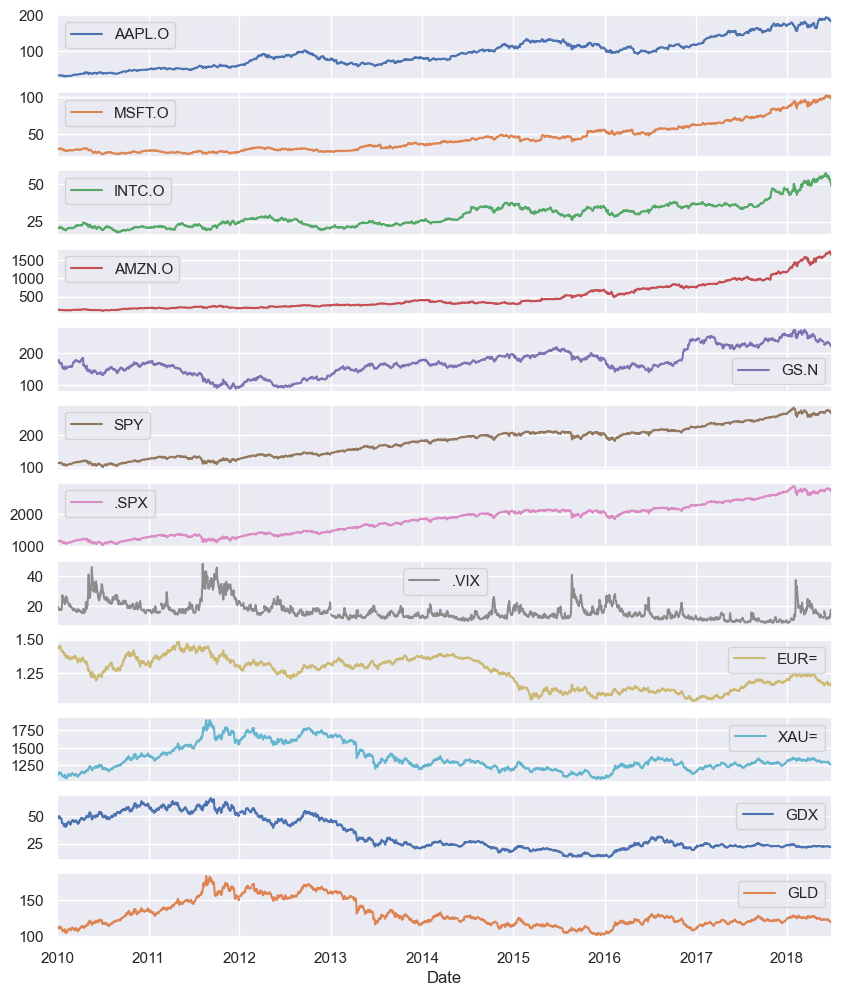

In [4]:
# 任务3：绘制展示各个指标的走势情况
data.plot(figsize=(10,12),subplots=True) #subplots=True子图的方式返回走势

<Axes: xlabel='Date'>

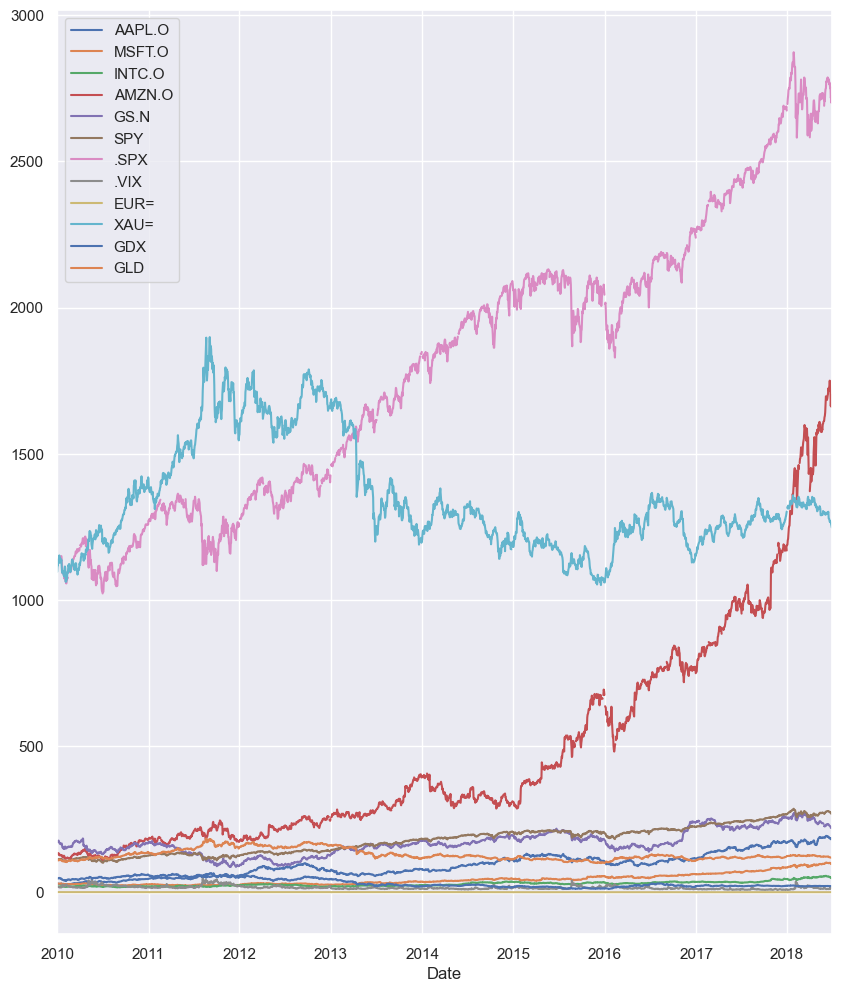

In [5]:
data.plot(figsize=(10,12)) #假如不要subplots=True，就是走势全部都在一个图表里

### 📒补充笔记：.plot( )
`data.plot()` 是 Pandas DataFrame 和 Series 对象上的一个方法，用于生成各种类型的图表。下面是 `.plot()` 方法的详细参数介绍：

#### 常用参数
- **data**：要绘制的 DataFrame 或 Series 对象。
- **kind**：指定图表类型的字符串。常见的选项有：
  - `'line'`：折线图（默认）
  - `'bar'`：垂直柱状图
  - `'barh'`：水平柱状图
  - `'hist'`：直方图
  - `'box'`：箱线图
  - `'kde'`：核密度估计图
  - `'density'`：核密度估计图，等同于 `'kde'`
  - `'area'`：面积图
  - `'pie'`：饼图
  - `'scatter'`：散点图（需要指定 `x` 和 `y` 参数）
  - `'hexbin'`：六边形箱图（需要指定 `x` 和 `y` 参数）

- **figsize**：指定图表的尺寸，元组格式，如 `(宽度, 高度)`。例如 `figsize=(10, 6)` 表示图表宽度为 10 英寸，高度为 6 英寸。

- **title**：图表的标题。

- **xlabel**：x 轴的标签。

- **ylabel**：y 轴的标签。

- **xlim**：设置 x 轴的范围，例如 `xlim=(0, 10)`。

- **ylim**：设置 y 轴的范围，例如 `ylim=(0, 10)`。

- **grid**：是否显示网格，布尔值，默认为 `False`。

- **legend**：是否显示图例，布尔值，默认为 `True`。

- **color**：指定颜色，可以是颜色的名字、颜色代码或一个颜色列表。

- **colormap**：指定颜色映射。

- **logx**：x 轴是否使用对数刻度，布尔值。

- **logy**：y 轴是否使用对数刻度，布尔值。

- **loglog**：x 和 y 轴是否都使用对数刻度，布尔值。

- **xticks**：指定 x 轴刻度。

- **yticks**：指定 y 轴刻度。

- **subplots**：是否为每列绘制单独的子图，布尔值。

- **sharex**：子图间是否共享 x 轴，布尔值。

- **sharey**：子图间是否共享 y 轴，布尔值。

- **layout**：子图的布局，例如 `(2, 2)` 表示 2 行 2 列。

- **rot**：旋转 x 轴标签的角度。

- **fontsize**：字体大小。

### 统计分析

- 1.数据中各项指标统计结果（小数点保留两位即可）：.describe() 
- 2.使用aggregate方法将多种统计指标汇总：aggregate() 

补充：aggregate() 方法适用于更灵活、个性化的汇总统计，而 .describe() 方法适用于生成固定的描述性统计摘要，用于快速了解数据集的基本特征。

In [6]:
data.info() 
#看数据的基本信息 2216个样本，从2010-01-01 to 2018-06-29，不一定每一天数据都有
#有一些指标有缺失值，比如 EUR=2216条 XAU=2211条

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [7]:
# 任务1.数据中各项指标统计结果（小数点保留两位即可）
data.describe().round(2) #看各项指标的统计结果，并只返回两位小数

# data.describe() 返回的结果是描述性统计摘要，它提供了数据集中数值列的统计信息。这些统计信息包括计数、均值、标准差、最小值、25th、50th
#（中位数）、75th 分位数和最大值。这些统计量都是聚合函数的结果，因为它们对整个数据集进行了汇总计算。

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [8]:
data.mean()

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

In [9]:
# 任务2.使用aggregate方法将多种统计指标汇总
data.aggregate([min,max,np.mean,np.std,np.median])  #想要什么指标就写进去

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.435687,23.010000,17.665000,108.610000,87.700000,102.200000,1022.580000,9.140000,1.038500,1051.360000,12.470000,100.50000
max,193.980000,102.490000,57.080000,1750.080000,273.380000,286.580000,2872.870000,48.000000,1.482600,1898.990000,66.630000,184.59000
mean,93.455973,44.561115,29.364192,480.461251,170.216221,180.323029,1802.713106,17.027133,1.248587,1349.014130,33.566525,130.08659
std,40.551559,19.527712,8.172160,372.307818,42.483935,48.190071,483.337146,5.883428,0.113711,188.745856,15.169564,18.78359
median,90.550624,39.660000,27.330000,322.065000,164.430000,186.320000,1863.080000,15.585000,1.270250,1292.610000,25.625000,124.00500


**👆代码解释 data.aggregate([min, max, np.mean, np.std, np.median])**
1. aggregate：这个方法用于将多个聚合函数应用于 DataFrame 的每一列。
2. [min, max, np.mean, np.std, np.median]：这是一个聚合函数列表，表示要对每一列应用的函数。可以是内置函数或 Numpy 函数。
其中：
- 内置函数：这些函数是 Python 语言本身提供的，不需要额外导入任何库或模块，因为它们已经包含在 Python 解释器中。例如，min() 和 max() 就是内置函数。
- 外部函数：这些函数不是 Python 解释器本身的一部分，而是通过导入外部库或模块才能使用的。例如，np.mean()、np.std() 和 np.median() 都属于 NumPy 库。在使用这些函数之前，需要先导入 NumPy 库。

### 📒补充笔记：函数类型如下：

1. **聚合函数**：用于对数据进行聚合计算的函数，例如 `SUM()`、`AVG()`、`COUNT()`、`MIN()`、`MAX()` 等。
   ```sql
   SELECT AVG(salary), COUNT(employee_id), MIN(hire_date), MAX(hire_date)
   FROM employees;
   ```

2. **字符串函数**：用于处理文本字符串的函数，例如 `UPPER()`、`LOWER()`、`SUBSTRING()`、`CONCAT()` 等。
   ```sql
   SELECT UPPER(name), SUBSTRING(description, 1, 50)
   FROM products;
   ```

3. **日期函数**：用于处理日期和时间的函数，例如 `DATE_FORMAT()`、`DATE_ADD()`、`DATE_DIFF()` 等。
   ```sql
   SELECT DATE_FORMAT(order_date, '%Y-%m-%d'), DATE_ADD(order_date, INTERVAL 1 DAY)
   FROM orders;
   ```

4. **数学函数**：用于执行数学运算的函数，例如 `ROUND()`、`ABS()`、`CEIL()`、`FLOOR()` 等。
   ```sql
   SELECT ROUND(price, 2), ABS(quantity), CEIL(discount), FLOOR(amount)
   FROM sales;
   ```

5. **条件函数**：用于根据条件执行操作的函数，例如 `CASE` 表达式。
   ```sql
   SELECT CASE WHEN age < 18 THEN 'Minor' ELSE 'Adult' END AS age_category
   FROM customers;
   ```

6. **窗口函数**：用于在查询结果中进行窗口化操作的函数，例如 `ROW_NUMBER()`、`RANK()`、`LAG()`、`LEAD()` 等。
   ```sql
   SELECT employee_id, salary, 
          ROW_NUMBER() OVER (PARTITION BY department_id ORDER BY salary DESC) AS rank
   FROM employees;
   ```

这些函数类型提供了 SQL 查询语言中的丰富功能，允许你对数据进行多种操作和转换。根据具体需求，你可以选择适当的函数来满足你的需求。如果有任何疑问，欢迎随时询问！

# 序列变化情况计算

- 1.计算每一天各项指标的差异值（后一天减去前一天结果），即返回每天的增幅/跌幅：.diff()
- 2.计算pct_change：增长率也就是 【后一个值-前一个）／前一个值】：.pct_change() 
- 3.计算平均计算pct_change指标
- 4.绘图观察哪个指标平均增长率最高——增长率可以算一个平均的，但是不能算累加的，因为没有意义
- 5.计算连续时间的增长率（其中需要计算今天价格和昨天价格的差异）——这一天，是前面这那天的多少倍
- 6.看看各个指标最初的1块钱相当于现在的多少（之前买了1块钱，现在是多少钱）

In [10]:
data.head() #看一下原始的数据

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


👇
**data.diff( )** 是 Pandas 中的一个方法，用于计算相邻元素之间的差异或变化。具体来说，它会计算每个元素与其前一个元素之间的差值。

参数说明：periods：可选参数，表示要计算的时间间隔。默认值为 1，表示与前一个元素进行比较。

In [11]:
# 任务1.计算每一天各项指标的差异值（后一天减去前一天结果），即返回每天的增幅/跌幅：.diff()
data.diff().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.01,0.79,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.07,-2.44,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.20,-2.25,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69


In [12]:
data.diff().mean() #看整体的差异

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

👇**data.pct_change()** 是 Pandas 中的一个方法，用于计算相邻元素之间的百分比变化率。具体来说，它会计算每个元素与其前一个元素之间的变化率，并将结果以百分比的形式表示。

参数说明：periods：可选参数，表示要计算的时间间隔。默认值为 1，表示与前一个元素进行比较。

In [13]:
# 任务2.计算pct_change：增长率也就是 【后一个值-前一个）／前一个值】：.pct_change() 
data.pct_change().head().round(3)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.022,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.034,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.020,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


In [14]:
# 任务3.计算平均计算pct_change指标
data.pct_change().mean() #看整体的差异

AAPL.O    0.000936
MSFT.O    0.000621
INTC.O    0.000499
AMZN.O    0.001332
GS.N      0.000242
SPY       0.000436
.SPX      0.000438
.VIX      0.002888
EUR=     -0.000075
XAU=      0.000109
GDX      -0.000072
GLD       0.000085
dtype: float64

<Axes: >

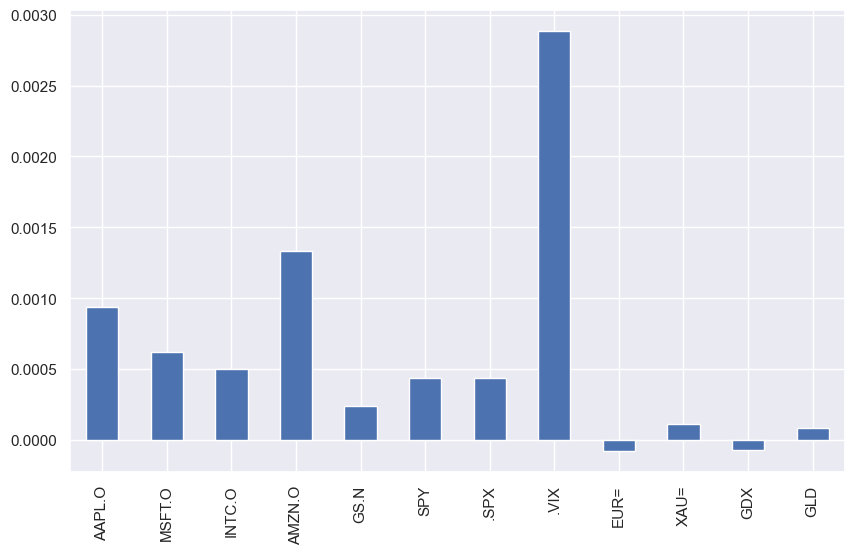

In [15]:
# 任务4.绘图观察哪个指标平均增长率最高

data.pct_change().mean().plot(kind='bar',figsize=(10,6)) 
#看整体的差异并画图展示出来
# 一个指标是一个结果，所以用 条形图 bar会比较合适

In [16]:
data.head() #原始的数据

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


In [17]:
data.shift(1).head() #所有数据向上移一格

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-05,30.572827,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-06,30.625684,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-07,30.138541,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51


In [18]:
rets = np.log(data/data.shift(1))

In [19]:
rets.head().round(3)   #一个连续的增长率的变化情况

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006,0.021,NaN,NaN
2010-01-05,0.002,0.000,-0.000,0.006,0.018,0.003,0.003,-0.035,-0.003,-0.001,0.010,-0.001
2010-01-06,-0.016,-0.006,-0.003,-0.018,-0.011,0.001,0.001,-0.010,0.003,0.018,0.024,0.016
2010-01-07,-0.002,-0.010,-0.010,-0.017,0.019,0.004,0.004,-0.005,-0.007,-0.006,-0.005,-0.006


### 任务6.看看各个指标最初的1块钱相当于现在的多少
👇 解释怎么计算任务六：要累加，用up.comsum([ ])
假如我们有 10，11，12，13，14年的值
11年的值：10和11年的值要加到一起
12年的值：10, 11 和 12年的值要加到一起
13年的值：10, 11, 12 和 13年的值要加到一起
14年的值：10, 11, 12,13 和 14年的值要加到一起

In [20]:
# 任务6.看看各个指标最初的1块钱相当于现在的多少
#试一下累加函数 np.cumsum([ ])
np.cumsum([1,2,3,4])

array([ 1,  3,  6, 10])

In [21]:
rets

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006125,0.021342,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,-0.002988,-0.001206,0.009595,-0.000911
2010-01-06,-0.016034,-0.006156,-0.003360,-0.018282,-0.010731,0.000704,0.000545,-0.009868,0.003058,0.017589,0.023999,0.016365
2010-01-07,-0.001850,-0.010389,-0.009662,-0.017160,0.019379,0.004212,0.003993,-0.005233,-0.006544,-0.005814,-0.004876,-0.006207
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,-0.014983,-0.020323,-0.034690,-0.031090,-0.020020,-0.013706,-0.013820,0.229947,0.004024,-0.002755,-0.007694,-0.003746
2018-06-26,0.012330,0.006988,-0.020722,0.016660,0.000181,0.002212,0.002202,-0.084863,-0.004883,-0.005040,-0.002730,-0.005269
2018-06-27,-0.001465,-0.015665,-0.018491,-0.018249,-0.006338,-0.008319,-0.008642,0.117783,-0.008018,-0.005593,-0.006399,-0.005718


In [22]:
rets.cumsum()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006125,0.021342,NaN,NaN
2010-01-05,0.001727,0.000323,-0.000479,0.005883,0.017525,0.002644,0.003111,-0.035038,0.003137,0.020136,0.009595,-0.000911
2010-01-06,-0.014307,-0.005833,-0.003839,-0.012399,0.006795,0.003347,0.003656,-0.044906,0.006195,0.037725,0.033594,0.015454
2010-01-07,-0.016157,-0.016221,-0.013501,-0.029559,0.026174,0.007560,0.007649,-0.050138,-0.000349,0.031911,0.028718,0.009247
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,1.466786,1.018777,0.810415,2.329927,0.237974,0.794630,0.809084,-2.326198,-0.202107,0.092620,-0.864185,-0.020548
2018-06-26,1.479115,1.025766,0.789693,2.346587,0.238155,0.796842,0.811286,-2.411061,-0.206990,0.087580,-0.866914,-0.025816
2018-06-27,1.477650,1.010101,0.771202,2.328338,0.231816,0.788523,0.802645,-2.293278,-0.215008,0.081987,-0.873313,-0.031534


In [23]:
rets.cumsum().apply(np.exp) #正确答案

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.006144,1.021572,NaN,NaN
2010-01-05,1.001729,1.000323,0.999521,1.005900,1.017680,1.002647,1.003116,0.965569,1.003142,1.020340,1.009642,0.999089
2010-01-06,0.985795,0.994184,0.996169,0.987677,1.006818,1.003353,1.003663,0.956088,1.006214,1.038446,1.034165,1.015574
2010-01-07,0.983973,0.983910,0.986590,0.970874,1.026520,1.007588,1.007679,0.951098,0.999651,1.032426,1.029134,1.009290
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,4.335277,2.769806,2.248841,10.277192,1.268676,2.213622,2.245850,0.097666,0.817008,1.097045,0.421395,0.979662
2018-06-26,4.389061,2.789231,2.202720,10.449843,1.268905,2.218523,2.250801,0.089720,0.813028,1.091529,0.420246,0.974514
2018-06-27,4.382635,2.745878,2.162364,10.260879,1.260888,2.200145,2.231435,0.100935,0.806535,1.085441,0.417566,0.968958


In [24]:
# rets.cumsum().applymap(np.exp) 

In [25]:
# rets.cumsum().applymap(np.exp).equals(rets.cumsum().apply(np.exp) )

👆：补充：如果你想在 Pandas DataFrame 中应用 NumPy 函数，你需要使用 `.apply()` 方法或 `.applymap()` 方法。这是因为 Pandas DataFrame 对象没有直接提供所有 NumPy 函数的方法。

- 如果你想对 DataFrame 中的每个元素应用一个函数，你可以使用 `.applymap()` 方法，它会逐元素地将函数应用到 DataFrame 中的所有元素上。
- 如果你想对 DataFrame 的每一列（或每一行）应用一个函数，你可以使用 `.apply()` 方法，它会将函数应用到 DataFrame 的每一列（或每一行）上。

这两种方法都允许你在 Pandas DataFrame 中使用 NumPy 函数，从而进行各种数据转换和处理操作。

<Axes: xlabel='Date'>

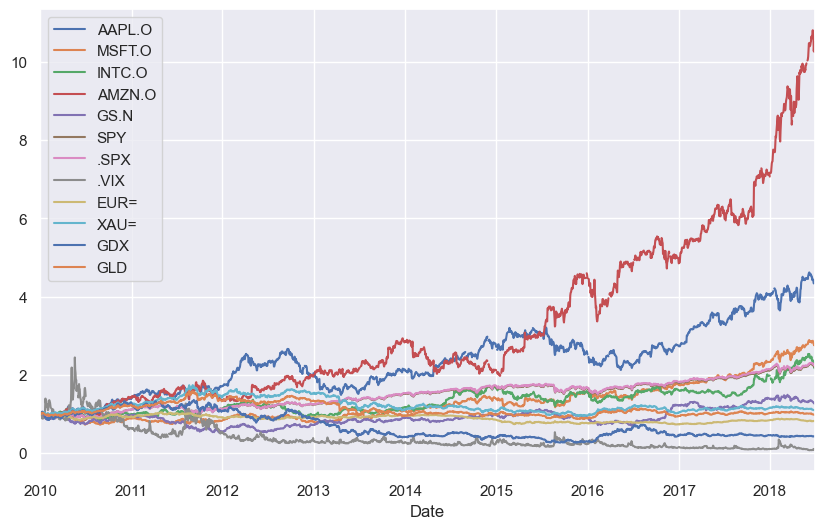

In [26]:
rets.cumsum().apply(np.exp).plot(figsize=(10,6)) #连续增长率。给答案画图

## 📒补充知识点：对数收益率和算数收益率

对数收益率是对称的这一点是相对算术收益率而言的，因为它在计算中使用了自然对数函数，这在处理百分比变化时能更好地反映实际增长率的对称性。具体而言，假设某资产的价格从100元涨到110元，然后再从110元跌回100元，其算术收益率和对数收益率的计算如下：

### 算术收益率

1. 从100元涨到110元：

- 算术收益率：{110 - 100}{100} = 0.10  或 10%


2. 从110元跌回100元：

- 算术收益率：{100 - 110}{110} = -0.0909  或  -9.09%


### 对数收益率
（旧的价格是分母，新的价格是分子）

1. 从100元涨到110元：

- 对数收益率 = loge 110/100 = loge 1.10 = ln 1.10 ，即 0.0953 或 9.53%

2. 从110元跌回100元：

- 对数收益率 = loge 100/110 = loge 1.10 = ln 0.9091 ，即 -0.0953 或 -9.53%

3. 此外，对数相加等于指数的乘积，所以loge 110/100 + loge 100/110 = loge （100/110 * 100/110）= loge 1 = ln 1 = 0


### 为什么对数收益率更对称？

对于对数收益率：
- 当价格从100元涨到110元时，对数收益率约为9.53%。
- 当价格从110元跌回100元时，对数收益率约为-9.53%。

这种对称性在算术收益率中无法体现，因为算术收益率在处理回撤时并不是线性的。例如，一个价格先上涨10%再下跌10%，其最终值并不会回到原始值。而对数收益率能更好地捕捉这种对称性和实际的变化幅度。



#   

#   

#   

#   

### 时间序列重采样
- 1.以星期为单位重构时间序列（例如以前是按照天为统计，现在换成周/年/月为统计）：resample
- 2.不同指定标签的含义？——.resample('1m'），一个月的数据，你要以哪一天为命名。left就是用第一天来命名。right就是用最后一天来命名。大部分用right

### 📒 .resample('1m',label='left').last().head()的用法

`resample('1w')` 中，`'1w'` 是表示重新取样频率的参数，它表示按照每周（week）的频率进行重新取样。除了 `'1w'`，还有其他的时间频率别名，如 `'1D'` 表示每天（day）、`'1M'` 表示每月（month）、`'1Y'` 表示每年（year）等等。除了这些别名之外，你还可以使用 `pandas` 支持的其他时间偏移字符串，比如 `'15T'` 表示每 15 分钟（minute）等等。

在 `resample('1w')` 之后，你可以链式调用各种汇总函数来对每个重新取样的时间窗口进行计算或者处理。一些常用的函数包括：

1. **聚合函数（Aggregation Functions）：** 可以对时间窗口内的数据进行汇总操作，如 `.sum()`（求和）、`.mean()`（均值）、`.median()`（中位数）、`.max()`（最大值）、`.min()`（最小值）等。

2. **统计函数（Statistics Functions）：** 可以对时间窗口内的数据进行统计计算，如 `.count()`（计数）、`.std()`（标准差）、`.var()`（方差）、`.quantile()`（分位数）等。

3. **其他函数：** 还可以使用其他一些函数来进行特定的处理或者计算，如 `.last()`（选择最后一个数据点）、`.first()`（选择第一个数据点）、`.apply()`（应用自定义函数）、`.rolling()`（滚动窗口计算）等。

这些函数的具体用法和效果可以根据你的需求和数据情况进行选择和组合。通过这些函数，你可以在重新取样后对数据进行各种统计计算、分析或者处理。

此外，例如 .resample('1m'），一个月的数据，你要以哪一天为命名。left就是用第一天来命名。right就是用最后一天来命名。大部分用right

In [27]:
data.resample('1w').last().head() 
#按照每周（'1w' 表示 week）的频率对时间序列数据进行重新取样，并且在每个时间窗口内选择最后一个数据点作为重新取样后的值。

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.282827,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.418542,30.86,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.249972,28.96,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.437544,28.18,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96


In [28]:
data.resample('1m').last().head()
#按照每月（'1m' 表示 week）的频率对时间序列数据进行重新取样，并且在每个时间窗口内选择最后一个数据点作为重新取样后的值。

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


In [29]:
#此外，例如 .resample('1m'），一个月的数据，你要以哪一天为命名。left就是用第一天来命名。right就是用最后一天来命名
data.resample('1m',label='left').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2009-12-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-01-31,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-02-28,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-03-31,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-04-30,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


In [30]:
#此外，例如 .resample('1m'），一个月的数据，你要以哪一天为命名。left就是用第一天来命名。right就是用最后一天来命名
data.resample('1m',label='right').last().head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.437544,28.1800,19.40,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.72,105.960
2010-02-28,29.231399,28.6700,20.53,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.89,109.430
2010-03-31,33.571395,29.2875,22.29,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.41,108.950
2010-04-30,37.298534,30.5350,22.84,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.51,115.360
2010-05-31,36.697106,25.8000,21.42,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.86,118.881


### 时间窗口
1. 以20为长度制作窗口序列
* 制作窗口序列时，将长度设置为20意味着每个窗口包含当前日期后的20天数据。如果你的时间序列数据是按照天（daily）的频率进行采样的，那么每个窗口将包含当前日期之后的20个连续日期的数据。
2. 统计窗口各个常用指标结果

In [31]:
#这一步预处理非常重要，否则后面的计算会出现非常多的NAN
data2 = data.dropna() 
# 创建一个名为 data2 的新 DataFrame，其中包含了 data 中去除了任何包含缺失值（NaN）的行的数据。
# 换句话说，它删除了 data 中任何一个单元格包含缺失值的行。

In [32]:
windows = 4

In [33]:
data2['AAPL.O'].rolling(window=windows)

Rolling [window=4,center=False,axis=0,method=single]

👆：当你调用 data2['AAPL.O'].rolling(window=windows) 时，它返回的是一个 Rolling 对象，而不是直接返回计算结果。这个 Rolling 对象包含了你指定的滚动窗口参数，如窗口大小、是否居中等。要得到计算结果，你需要对这个 Rolling 对象应用一个聚合函数，比如 .mean()、.sum()、.min() 等。

In [34]:
data2['AAPL.O'].rolling(window=windows).min()
#min()表示取每10天连续数值的最小值（即每个窗口的最小值）

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07     30.082827
2010-01-08     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    182.170000
2018-06-27    182.170000
2018-06-28    182.170000
2018-06-29    184.160000
Name: AAPL.O, Length: 2138, dtype: float64

In [35]:
#把窗口的数据加入到数据中
data2['min'] = data2['AAPL.O'].rolling(window=windows).min()
data2['max'] = data2['AAPL.O'].rolling(window=windows).max()
data2['mean'] = data2['AAPL.O'].rolling(window=windows).mean()
data2['std'] = data2['AAPL.O'].rolling(window=windows).std()

In [36]:
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58


In [37]:
data2
# 前面3行空值是正常的，因为窗口还没到那个长度

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,min,max,mean,std
Date,,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80,NaN,NaN,NaN,NaN
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70,NaN,NaN,NaN,NaN
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51,NaN,NaN,NaN,NaN
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82,30.082827,30.625684,30.35497,0.283814
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37,30.082827,30.625684,30.28247,0.243836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89,182.170000,186.500000,184.76250,1.848538
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26,182.170000,185.460000,184.24500,1.445879
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58,182.170000,184.920000,183.92000,1.208332


### 股票序列分析策略（分析什么时候该买，什么时候不该买）
- 1.短期平均计算
- 2.长期平均计算
- 3.黄金交叉与死亡交叉绘图展示


#### 补充：
股票的“黄金交叉”和“死亡交叉”是技术分析中常用的术语，用于描述两条移动平均线（通常是短期和长期移动平均线）相交的情况。

1. **黄金交叉（Golden Cross）**：当短期移动平均线（如 50 日均线）从下方穿越长期移动平均线（如 200 日均线）时，形成了一个向上的交叉点。这被视为一个买入信号，暗示着股票价格可能会上涨。这种交叉被称为“黄金交叉”，因为短期均线从下方突破长期均线，好像金价上涨一样。

2. **死亡交叉（Death Cross）**：相反地，当短期移动平均线从上方穿越长期移动平均线时，形成了一个向下的交叉点。这被视为一个卖出信号，暗示着股票价格可能会下跌。这种交叉被称为“死亡交叉”，因为短期均线从上方突破长期均线，好像价格要下跌一样。

这些交叉点的出现通常被视为市场趋势的转折点，因此经常被技术分析师用来辅助决策。然而，它们并不是绝对的信号，有时也会出现错误的判断，因此投资者在使用时需要结合其他指标和分析来进行决策。

In [38]:
#以苹果股票为例
data2['m1'] = data2['AAPL.O'].rolling(window=50).mean()  #短期移动平均线（如 30 日均线）——常见是50

In [39]:
#以苹果股票为例
data2['m2'] = data2['AAPL.O'].rolling(window=200).mean() #长期移动平均线（如 250 日均线）——常见是200

In [40]:
data2[['AAPL.O','m1','m2']] #展示结果：苹果每日股价，短期移动平均线（如 30 日均线），长期移动平均线（如 250 日均线）

,AAPL.O,m1,m2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2018-06-25,182.170000,183.1542,172.0353
2018-06-26,184.430000,183.3264,172.1643
2018-06-27,184.160000,183.4448,172.2776


In [41]:
data2[['AAPL.O','m1','m2']].tail() #展示结果：苹果每日股价，短期移动平均线（如 30 日均线），长期移动平均线（如 250 日均线）

,AAPL.O,m1,m2
Date,,,
2018-06-25,182.17,183.1542,172.0353
2018-06-26,184.43,183.3264,172.1643
2018-06-27,184.16,183.4448,172.2776
2018-06-28,185.50,183.5980,172.4008
2018-06-29,185.11,183.8442,172.5281


<Axes: xlabel='Date'>

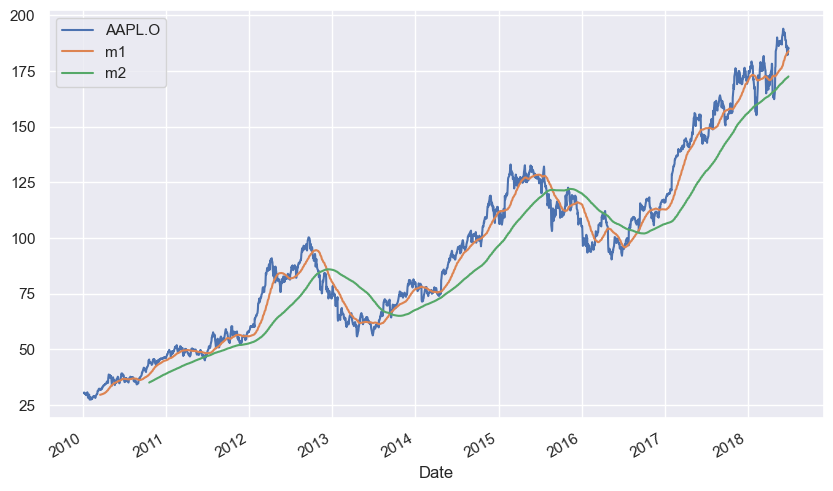

In [42]:
# 画出交界点步骤 1
data2[['AAPL.O','m1','m2']].plot(figsize=(10,6)) #展示结果，就可以找出黄金交叉和死亡交叉


# 蓝色是股价，橘色是短期，绿色是长期

In [43]:
data2['positions'] = np.where(data2['m1']>data2['m2'],1,-1)
data2

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD,min,max,mean,std,m1,m2,positions
Date,,,,,,,,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80,NaN,NaN,NaN,NaN,NaN,NaN,-1
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70,NaN,NaN,NaN,NaN,NaN,NaN,-1
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51,NaN,NaN,NaN,NaN,NaN,NaN,-1
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82,30.082827,30.625684,30.35497,0.283814,NaN,NaN,-1
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37,30.082827,30.625684,30.28247,0.243836,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54,271.00,2717.07,17.33,1.1702,1265.00,22.01,119.89,182.170000,186.500000,184.76250,1.848538,183.1542,172.0353,1
2018-06-26,184.430000,99.080,49.67,1691.09,221.58,271.60,2723.06,15.92,1.1645,1258.64,21.95,119.26,182.170000,185.460000,184.24500,1.445879,183.3264,172.1643,1
2018-06-27,184.160000,97.540,48.76,1660.51,220.18,269.35,2699.63,17.91,1.1552,1251.62,21.81,118.58,182.170000,184.920000,183.92000,1.208332,183.4448,172.2776,1


<Axes: xlabel='Date'>

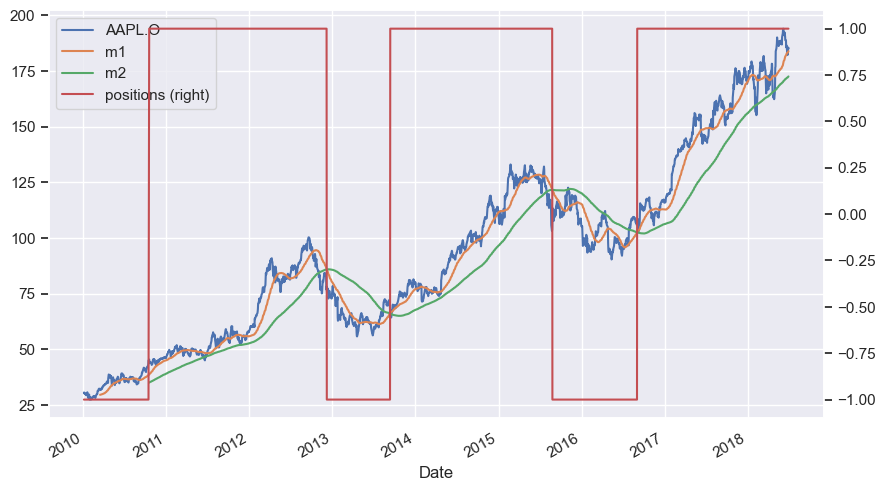

In [44]:
# 画出交界点步骤 2
data2[['AAPL.O','m1','m2','positions']].plot(figsize=(10,6),secondary_y='positions')

# secondary_y='positions' 参数将 'positions' 列的数据绘制在右侧的 Y 轴上，这是因为 'positions' 列可能具有不同的数量级或范围，
# 与其他列的数据不同，因此需要使用次要 Y 轴来更好地展示。

# 蓝色是股价，橘色是短期，绿色是长期
# 2013年年初那个位置，短期均线和长期均线交叉，短期均线向下，长期均线向上 —— 死亡交叉（Death Cross）记得卖出
# 2017年大概8月的那个位置，短期均线和长期均线交叉，短期均线向向上，长期均线向下 —— 黄金交叉（Golden Cross），可以买入

### 回归分析：看变量之间有怎么样的一个关系，或者变量之间的走势是否有相互影响/关联
- 1.[.spx与.vix]指标之间的关系：选两个指标 标普500 和 恐慌指数，并观察他们之间的关系
- 2.绘图展示他们之间的变化情况
- 3.回归与相关系数计算
- 4.随着年份的变化，计算相关系数的变化情况，并展示

In [45]:
# 任务1.[.spx与.vix]指标之间的关系：选两个指标 标普500 和 恐慌指数，并观察他们之间的关系
data2 = data2[['.SPX','.VIX']]
data2

,.SPX,.VIX
Date,,
2010-01-04,1132.99,20.04
2010-01-05,1136.52,19.35
2010-01-06,1137.14,19.16
2010-01-07,1141.69,19.06
2010-01-08,1144.98,18.13
...,...,...
2018-06-25,2717.07,17.33
2018-06-26,2723.06,15.92
2018-06-27,2699.63,17.91


<Axes: xlabel='Date'>

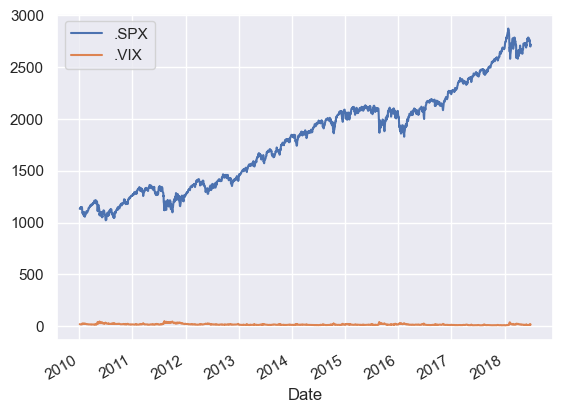

In [46]:
# 做法一：是否相关：直接在图中给它画出来就行
data2.plot() #subplots=True: 表示为 DataFrame 中的每一列创建一个独立的子图。
# 注意不拆分两个图的时候看不出来

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

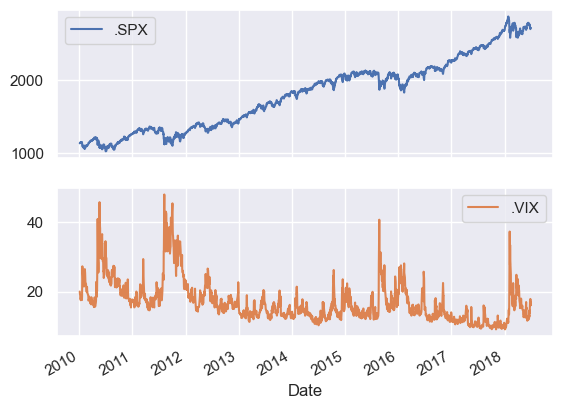

In [47]:
# 做法一：是否相关：直接在图中给它画出来就行：解决方法1拆成两个图
data2.plot(subplots=True) #subplots=True: 表示为 DataFrame 中的每一列创建一个独立的子图。

<Axes: xlabel='Date'>

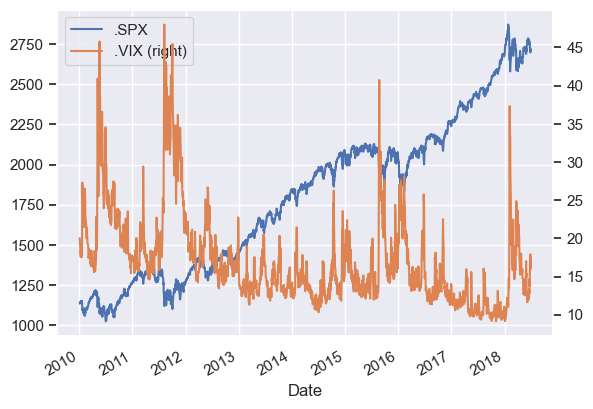

In [48]:
# 做法一：是否相关：直接在图中给它画出来就行：解决方法2 用2个轴
data2.plot(secondary_y='.VIX') #这里是八年的数据

<Axes: xlabel='Date'>

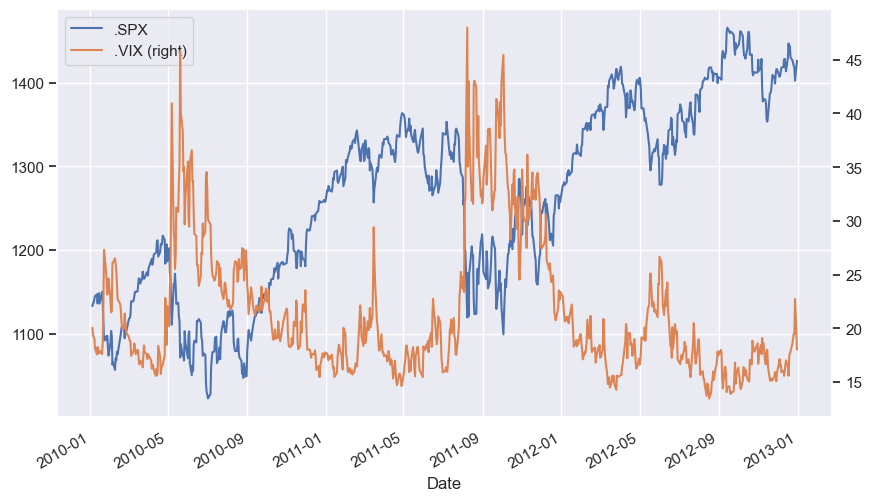

In [49]:
# 做法一：是否相关：#这里是最终的结果！！！：看见黄色的上升，绿色的下降。绿色的下降，黄色的上升

data2.loc[:'2012-12-31'].plot(secondary_y='.VIX',figsize=(10,6)) #调整一下大小
 #之前是8年的数据 现在只选择2年的数据

# 做法二：算增长率+用散点图表示

In [62]:
rets = np.log(data2/data2.shift(1)) #算每一天的增长率
rets.head()

,.SPX,.VIX
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.003111,-0.035038
2010-01-06,0.000545,-0.009868
2010-01-07,0.003993,-0.005233
2010-01-08,0.002878,-0.050024


array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

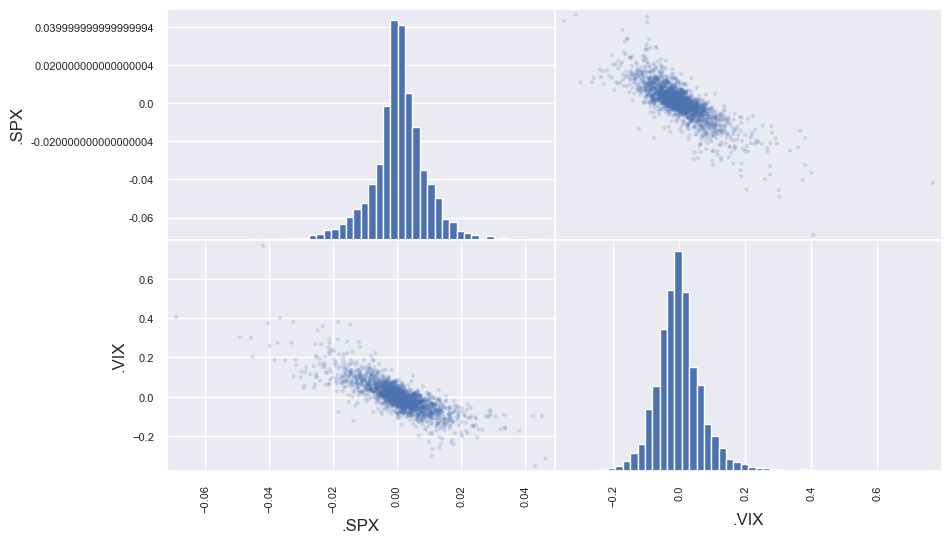

In [63]:
pd.plotting.scatter_matrix(rets,
                           alpha = 0.2, #指定透明度，别让太多的点堆在一起
                           diagonal='hist', #直方图
                           hist_kwds={'bins':50},
                           figsize=(10,6)
)
# 看散点图的趋势可以知道他们负相关

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

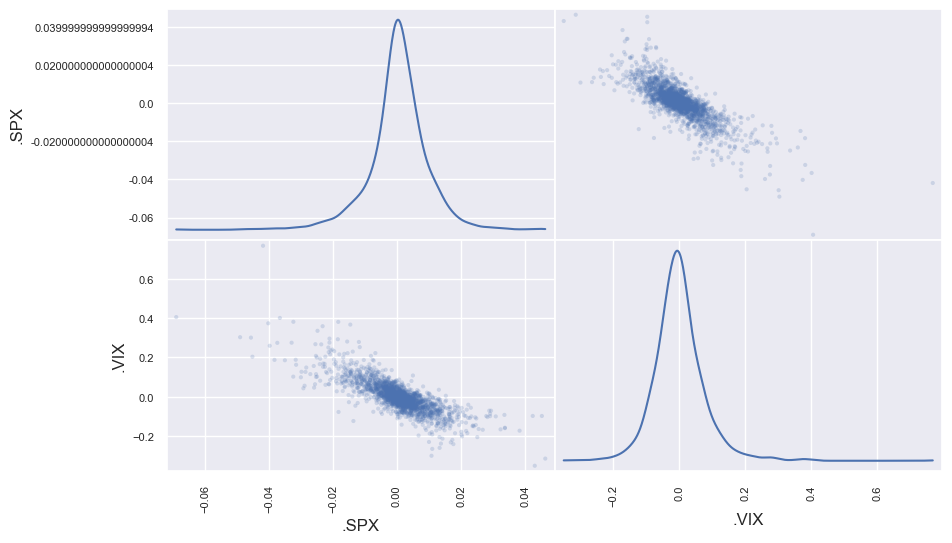

In [64]:
pd.plotting.scatter_matrix(rets,
                           alpha = 0.2,
                           diagonal='kde', #改成曲线
                           figsize=(10,6)
)

## 构建散点图+回归方程

In [70]:
rets.dropna(inplace =True) #先处理控制

👇**reg = np.polyfit(rets['.SPX'],rets['.VIX'],deg=1)**


这段代码使用 numpy 库中的 polyfit 函数进行多项式拟合。具体来说，它将标准普尔500指数收益率 (rets['.SPX']) 和波动率指数收益率 (rets['.VIX']) 之间的关系拟合成一个多项式函数。

参数 deg=1 指定了拟合的多项式的次数为 1，即线性拟合。这样，polyfit 函数将会返回一个一次多项式，即一条直线，用来描述这两个变量之间的线性关系。

线性拟合是一种统计分析方法，用于描述两个变量之间的线性关系。在线性拟合中，我们尝试找到一条直线，使得这条直线与数据的整体趋势最为接近**y=kx+b** 其中，y 是响应变量（因变量），x 是预测变量（自变量），m 是斜率，b 是截距。

reg 是一个数组，其中包含了拟合出来的多项式的系数。对于一次多项式，reg 中会有两个值，分别表示截距和斜率。

在这个语句中，`rets['.SPX']` 是自变量（x），`rets['.VIX']` 是因变量（y）。因此，我们希望通过 `.SPX` 的值来预测 `.VIX` 的值，即通过标准普尔500指数的收益率来预测波动率指数的收益率。

In [73]:
reg = np.polyfit(rets['.SPX'],rets['.VIX'],deg=1)
reg
# 其中 k= -6.65160028e+00,  b = 2.62132142e-03

array([-6.65160028e+00,  2.62132142e-03])

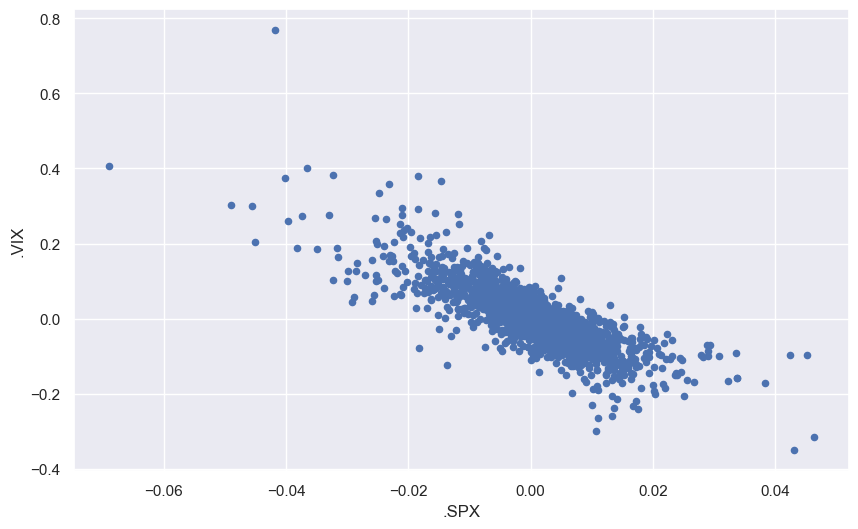

In [75]:
ax = rets.plot(kind='scatter',x='.SPX',y='.VIX',figsize=(10,6)) #这是一个散点图

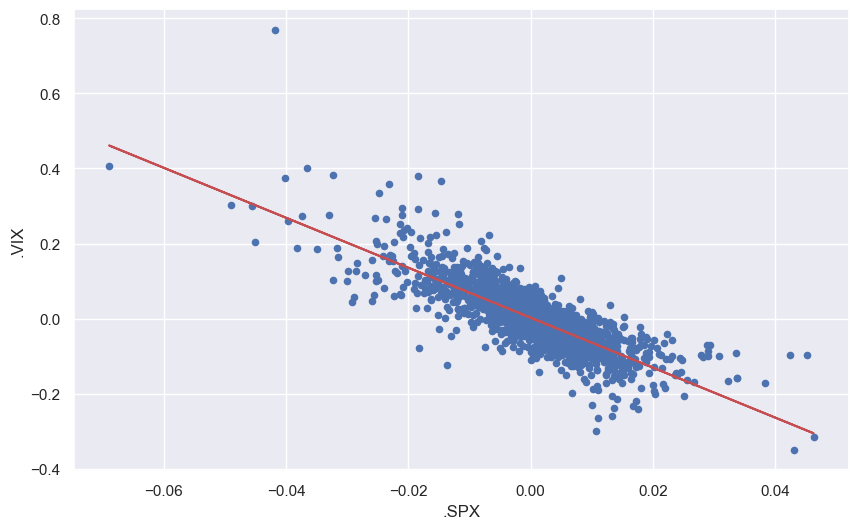

In [76]:
# 答案：明显他们是增长率是负相关的

ax = rets.plot(kind='scatter',x='.SPX',y='.VIX',figsize=(10,6)) #这是一个散点图
ax.plot(rets['.SPX'],np.polyval(reg,rets['.SPX'],),'r') #在散点图上，再画一个回归方程
# x值是['.SPX']，但是y值需要['.SPX']和上一步得到的系数来反过来求。相当于之前上一步求出了k和b，又代入回来求 y=kx + b
#‘r’改成红色

相关系数

In [79]:
rets.corr() #算出相关系数

,.SPX,.VIX
.SPX,1.000000,-0.804382
.VIX,-0.804382,1.000000


<Axes: xlabel='Date'>

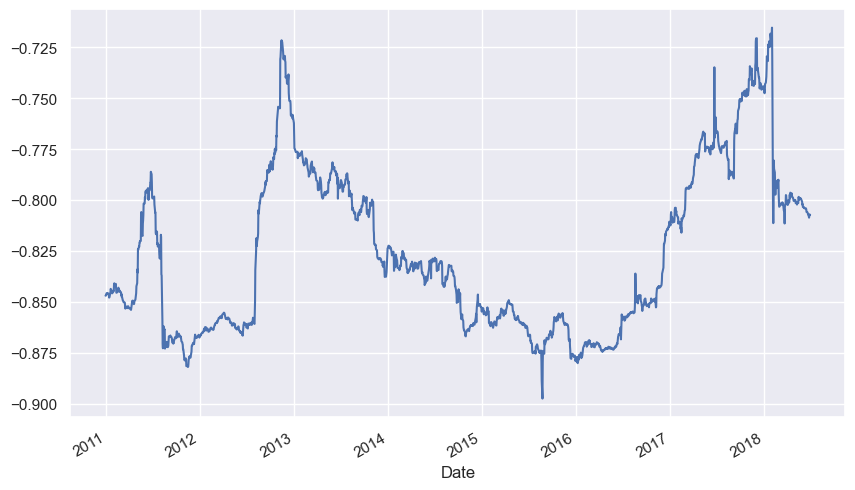

In [80]:
# 4.随着年份的变化，计算相关系数的变化情况，并展示

rets['.SPX'].rolling(window=250).corr(rets['.VIX']).plot(figsize=(10,6))

#相关系数是一种统计量，用于衡量两个变量之间的线性相关程度。它的取值范围在 -1 到 1 之间：

- 当相关系数为 1 时，表示两个变量完全正相关，即一个变量的增加总是伴随着另一个变量的增加。
- 当相关系数为 -1 时，表示两个变量完全负相关，即一个变量的增加总是伴随着另一个变量的减少。
- 当相关系数接近于 0 时，表示两个变量之间几乎没有线性关系。

相关系数的计算方法通常使用皮尔逊相关系数（Pearson correlation coefficient），它用于衡量两个连续变量之间的线性关系。如果数据不符合线性关系，相关系数的解释可能会受到影响。

相关系数提供了一种简单的方法来理解两个变量之间的关系，对于探索性数据分析和建立统计模型都非常有用。